In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('CC_GENERAL.csv')

In [3]:
ds.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
ds.shape

(8950, 18)

In [5]:
ds.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
ds = ds.dropna()

In [7]:
ds.shape

(8636, 18)

In [8]:
ds.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
X = ds.iloc[:,[1,2,3,4,5,6,7,8,9,10,13,14,16,17]].values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
X = ss.fit_transform(X)

In [13]:
from scipy.cluster import hierarchy as sch

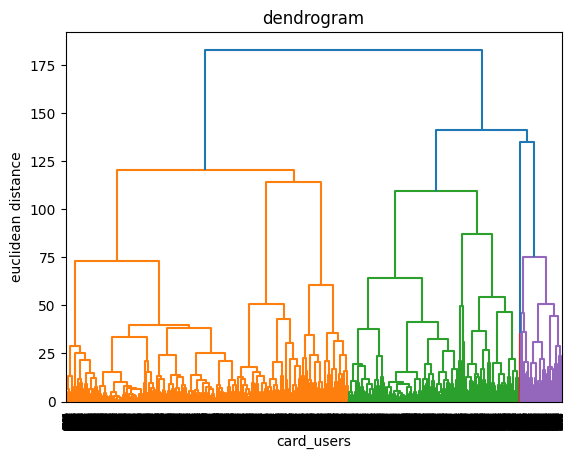

In [15]:
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('dendrogram')
plt.xlabel('card_users')
plt.ylabel('euclidean distance')
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [17]:
X_pca.shape

(8636, 2)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
hc = AgglomerativeClustering(n_clusters = 9,linkage = 'ward')
Y_hc = hc.fit_predict(X)

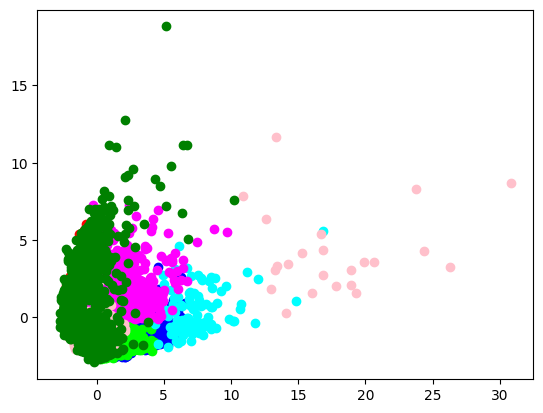

In [28]:

plt.scatter(X_pca[Y_hc == 0,0],X_pca[Y_hc == 0,1],color = 'red',label ='Cluster 1')
plt.scatter(X_pca[Y_hc == 1,0],X_pca[Y_hc == 1,1],color = 'blue',label ='Cluster 2')
plt.scatter(X_pca[Y_hc == 2,0],X_pca[Y_hc == 2,1],color = 'lime',label ='Cluster 3')
plt.scatter(X_pca[Y_hc == 3,0],X_pca[Y_hc == 3,1],color = 'cyan',label ='Cluster 4')
plt.scatter(X_pca[Y_hc == 4,0],X_pca[Y_hc == 4,1],color = 'magenta',label ='Cluster 5')
plt.scatter(X_pca[Y_hc == 5,0],X_pca[Y_hc == 5,1],color = 'pink',label ='Cluster 6')
plt.scatter(X_pca[Y_hc == 6,0],X_pca[Y_hc == 6,1],color = 'green',label ='Cluster 7')
plt.scatter(X_pca[Y_hc == 7,0],X_pca[Y_hc == 7,1],color = 'pink',label ='Cluster 8')
plt.scatter(X_pca[Y_hc == 8,0],X_pca[Y_hc == 8,1],color = 'green',label ='Cluster 9')

In [29]:
from sklearn.cluster import KMeans

In [22]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

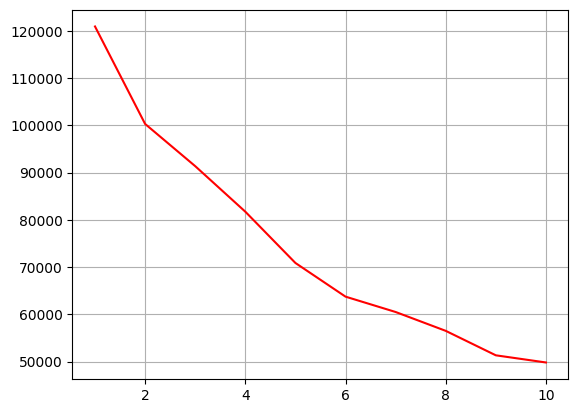

In [31]:
plt.plot(range(1,11),WCSS,color='red')
plt.grid('true')